In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

In [150]:
df=pd.read_csv('indian_liver_patient.csv')

In [151]:
# Create dummy or indicator features for categorical variables
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Select numeric columns for scaling
numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numeric columns to scale them between 0 and 1
df_dummies[numeric_cols] = scaler.fit_transform(df_dummies[numeric_cols])

# Define features (X) and target (y)
X = df_dummies.drop(columns=['Dataset'])
y = df['Dataset']

# Check for NaN values before imputation
print("NaN values before imputation:")
print(X.isna().sum())

# Handle missing values by using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame
X = pd.DataFrame(X, columns=df_dummies.drop(columns=['Dataset']).columns)

# Check for NaN values after imputation
print("NaN values after imputation:")
print(X.isna().sum())

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the first few rows of the transformed data
print(df_dummies.head())

NaN values before imputation:
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Gender_Male                   0
dtype: int64
NaN values after imputation:
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Gender_Male                   0
dtype: int64
        Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302         0.004021          0.000000              0.060576   
1  0.674419         0.140751          0.275510              0.310699   
2  0.674419         0.092493          0.204082             

In [152]:
y.value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

**Random Forest Model**

In [154]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth= 10, max_features=10, min_samples_leaf=2)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [155]:
rf_grid = RandomForestClassifier()
gr_space = {
    'max_depth': [3,5,7,10],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [10, 20, 30 , 40],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy')
model_grid = grid.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))

Best hyperparameters are {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 2, 'n_estimators': 100}
Best score is: 0.7231734215605184


In [156]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.77      0.74        83
           2       0.32      0.26      0.29        34

    accuracy                           0.62       117
   macro avg       0.52      0.52      0.52       117
weighted avg       0.60      0.62      0.61       117

Confusion Matrix:
[[64 19]
 [25  9]]


In [157]:
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))

f1_log_reg=f1_score(y_test, y_pred,average='weighted')
print(f1_log_reg)

Recall score: 0.7710843373493976
Precision score: 0.7191011235955056
0.6122940991658171


In [178]:
# Initialize the LogisticRegression model
log_reg_model = LogisticRegression()

# Create a parameter grid
param_grid2 = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}


grid2 = GridSearchCV(log_reg_model, param_grid2, cv = 3, scoring='accuracy')
model_grid2 = grid2.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid2.best_params_))
print('Best score is: ' + str(model_grid2.best_score_))

Best hyperparameters are {'C': 1, 'penalty': 'l2'}
Best score is: 0.7146126275158533


In [180]:
log_reg_model = LogisticRegression(C= 10, penalty= 'l2',random_state=14)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

f1_log_reg=f1_score(y_test, y_pred,average='weighted')
print(f1_log_reg)

Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.77      0.74        83
           2       0.32      0.26      0.29        34

    accuracy                           0.62       117
   macro avg       0.52      0.52      0.52       117
weighted avg       0.60      0.62      0.61       117

Confusion Matrix:
[[64 19]
 [25  9]]
0.6122940991658171


**Logistic Regression Model**

**KNN Model**

In [184]:
# Initialize the LogisticRegression model
knn_model = KNeighborsClassifier()

# Create a parameter grid
param_grid3 = {
    'n_neighbors': [5, 10, 30, 50],
    'weights':['uniform', 'distance']
}


grid3 = GridSearchCV(knn_model, param_grid3, cv = 3, scoring='accuracy')
model_grid3 = grid3.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid3.best_params_))
print('Best score is: ' + str(model_grid3.best_score_))

Best hyperparameters are {'n_neighbors': 50, 'weights': 'distance'}
Best score is: 0.7188861317893576


In [186]:
knn_model = KNeighborsClassifier(n_neighbors= 50, weights= 'distance')

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))

f1_log_reg=f1_score(y_test, y_pred,average='weighted')
print(f1_log_reg)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.99      0.84        83
           2       0.75      0.09      0.16        34

    accuracy                           0.73       117
   macro avg       0.74      0.54      0.50       117
weighted avg       0.73      0.73      0.64       117

Confusion Matrix:
[[82  1]
 [31  3]]
0.6122940991658171


In [190]:
# Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print accuracy scores
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')

Logistic Regression Accuracy: 0.70
Random Forest Accuracy: 0.62
K-Nearest Neighbors Accuracy: 0.73


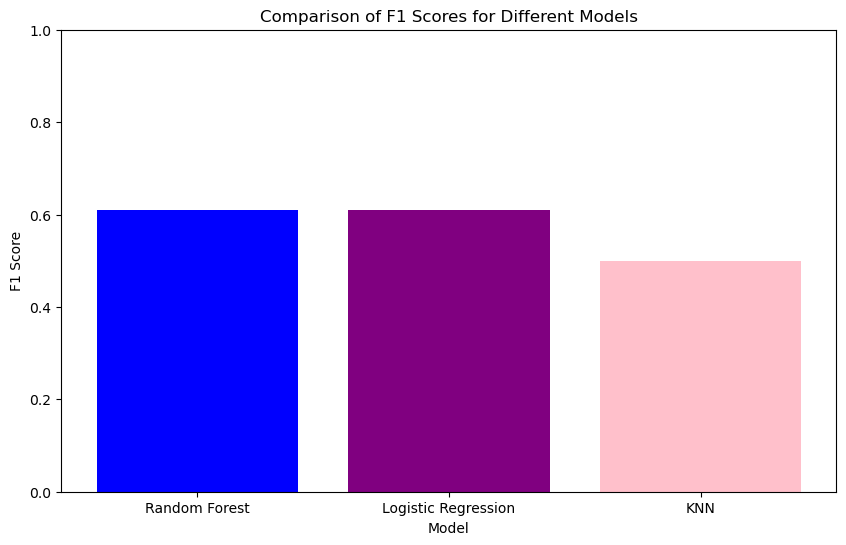

In [196]:
# F1 scores for each model
f1_scores = {
    'Random Forest': 0.61,
    'Logistic Regression': 0.61,
    'KNN': 0.50
}

# Plotting the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'purple', 'pink'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1)
plt.show()

**Based on the weighted F1 scores alone, the Random Forest and Logistic Regression models perform equally well and are better than the KNN model. Therefore, you can consider the Random Forest and Logistic Regression models as the better ones compared to the KNN model in this context.**